In [100]:
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler

import warnings
from sklearn.exceptions import ConvergenceWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)


# Data Exploring

In [101]:
df_household=pd.read_csv('household_power_consumption.txt', sep=';', decimal='.', header=0, low_memory=False, na_values="?",)

df_household.dtypes

Date                      object
Time                      object
Global_active_power      float64
Global_reactive_power    float64
Voltage                  float64
Global_intensity         float64
Sub_metering_1           float64
Sub_metering_2           float64
Sub_metering_3           float64
dtype: object

In [102]:
df_household["Datetime"] = pd.to_datetime(
    df_household["Date"] + " " + df_household["Time"],
    dayfirst=True
)

df_household = df_household.set_index("Datetime")
df_household = df_household.drop(columns=["Date", "Time"])


In [103]:
df_household

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0
...,...,...,...,...,...,...,...
2010-11-26 20:58:00,0.946,0.000,240.43,4.0,0.0,0.0,0.0
2010-11-26 20:59:00,0.944,0.000,240.00,4.0,0.0,0.0,0.0
2010-11-26 21:00:00,0.938,0.000,239.82,3.8,0.0,0.0,0.0


In [104]:
df_household.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [105]:
jours_nan = (
    df_household
    .isna()
    .any(axis=1)                       
    .groupby(df_household.index.date)  
    .any()                             
)

jours_nan = jours_nan[jours_nan].index

jours_nan

Index([2006-12-21, 2006-12-30, 2007-01-14, 2007-01-28, 2007-02-22, 2007-03-25,
       2007-04-28, 2007-04-29, 2007-04-30, 2007-06-01, 2007-06-06, 2007-06-09,
       2007-06-19, 2007-06-29, 2007-07-15, 2007-07-22, 2007-08-01, 2007-08-24,
       2007-09-26, 2007-10-23, 2007-11-21, 2007-11-29, 2007-12-17, 2008-01-13,
       2008-02-02, 2008-02-23, 2008-03-24, 2008-05-16, 2008-06-13, 2008-07-13,
       2008-08-04, 2008-08-31, 2008-10-25, 2008-11-10, 2008-11-12, 2008-11-23,
       2008-12-10, 2008-12-20, 2009-01-14, 2009-02-01, 2009-02-14, 2009-02-17,
       2009-03-01, 2009-03-16, 2009-04-13, 2009-05-10, 2009-05-26, 2009-06-13,
       2009-06-14, 2009-06-15, 2009-07-10, 2009-08-13, 2009-09-13, 2009-09-30,
       2009-10-11, 2009-11-09, 2009-12-10, 2010-01-02, 2010-01-12, 2010-01-13,
       2010-01-14, 2010-01-23, 2010-02-10, 2010-02-14, 2010-03-20, 2010-03-21,
       2010-04-11, 2010-05-13, 2010-06-12, 2010-06-29, 2010-07-15, 2010-08-17,
       2010-08-18, 2010-08-19, 2010-08-20, 2010-08-2

In [106]:
df_household[df_household.isnull().any(axis=1)]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,,
2006-12-21 11:23:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-21 11:24:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:08:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006-12-30 10:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007-01-14 18:36:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
2010-09-28 19:09:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:10:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 19:11:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [107]:
df_household.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01


<Axes: >

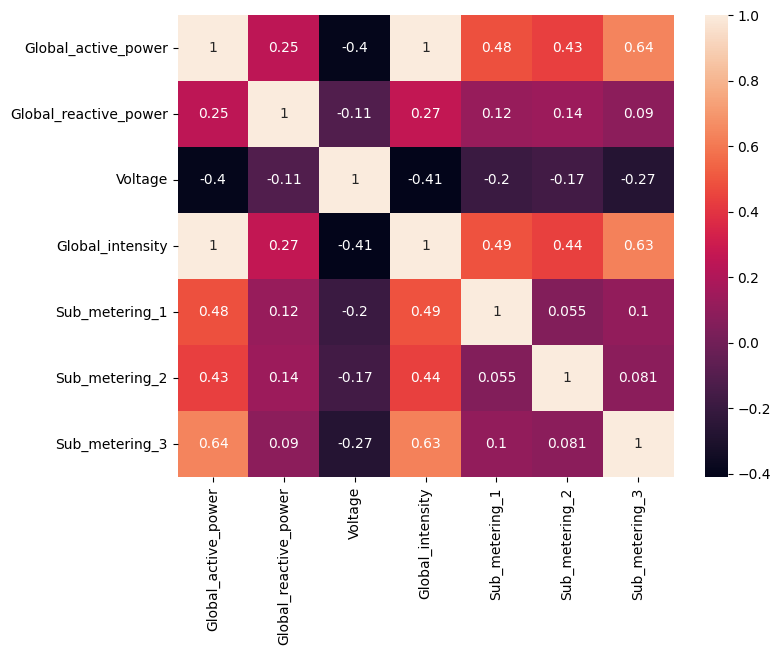

In [108]:
plt.figure(figsize=(8,6))
corr = df_household.corr()
sns.heatmap(corr, annot=True)

In [109]:
df_household = df_household.drop(['Global_intensity'],axis=1)
df_household.head()

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,0.0,1.0,17.0


In [110]:
df_household_hourly = df_household.resample('1h', label='right', closed='right').mean()
df_household_hourly

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,
2006-12-16 18:00:00,4.184162,0.227676,234.721622,0.0,0.513514,16.891892
2006-12-16 19:00:00,3.653533,0.078500,234.488000,0.0,6.733333,16.850000
2006-12-16 20:00:00,3.385833,0.085067,233.239833,0.0,1.416667,16.666667
2006-12-16 21:00:00,3.270367,0.075000,234.143667,0.0,0.000000,16.800000
2006-12-16 22:00:00,3.058967,0.078300,237.146500,0.0,0.433333,17.216667
...,...,...,...,...,...,...
2010-11-26 18:00:00,1.729200,0.063767,237.101667,0.0,0.000000,12.866667
2010-11-26 19:00:00,1.585367,0.051333,237.472667,0.0,0.000000,0.000000
2010-11-26 20:00:00,1.653433,0.060033,236.784167,0.0,0.100000,0.000000


In [111]:
df_household_hourly[df_household_hourly.isnull().any(axis=1)]

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,
2007-04-28 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-28 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-28 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-28 05:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2007-04-28 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
2010-09-28 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN
2010-09-28 17:00:00,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
jours_nan = (
    df_household_hourly
    .isna()
    .any(axis=1)                       
    .groupby(df_household_hourly.index.date)  
    .any()                             
)

jours_nan = jours_nan[jours_nan].index

jours_nan

Index([2007-04-28, 2007-04-29, 2007-04-30, 2007-07-15, 2009-06-13, 2009-06-14,
       2009-06-15, 2009-08-13, 2010-01-12, 2010-01-13, 2010-01-14, 2010-03-20,
       2010-03-21, 2010-08-17, 2010-08-18, 2010-08-19, 2010-08-20, 2010-08-21,
       2010-08-22, 2010-09-25, 2010-09-26, 2010-09-27, 2010-09-28],
      dtype='object')

In [113]:
df_household_hourly = df_household_hourly.dropna()
df_household_hourly.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Sub_metering_1           0
Sub_metering_2           0
Sub_metering_3           0
dtype: int64

In [114]:
df_household_hourly

,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
Datetime,,,,,,
2006-12-16 18:00:00,4.184162,0.227676,234.721622,0.0,0.513514,16.891892
2006-12-16 19:00:00,3.653533,0.078500,234.488000,0.0,6.733333,16.850000
2006-12-16 20:00:00,3.385833,0.085067,233.239833,0.0,1.416667,16.666667
2006-12-16 21:00:00,3.270367,0.075000,234.143667,0.0,0.000000,16.800000
2006-12-16 22:00:00,3.058967,0.078300,237.146500,0.0,0.433333,17.216667
...,...,...,...,...,...,...
2010-11-26 18:00:00,1.729200,0.063767,237.101667,0.0,0.000000,12.866667
2010-11-26 19:00:00,1.585367,0.051333,237.472667,0.0,0.000000,0.000000
2010-11-26 20:00:00,1.653433,0.060033,236.784167,0.0,0.100000,0.000000


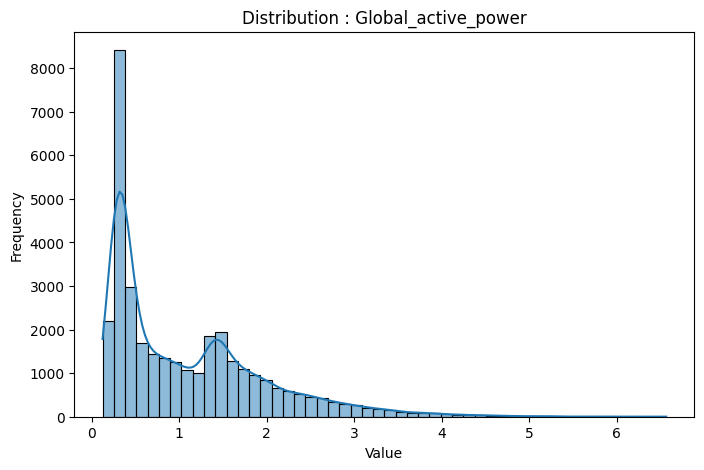

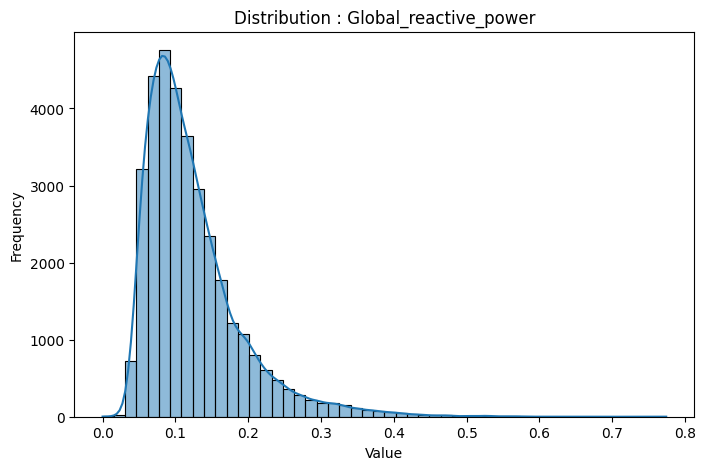

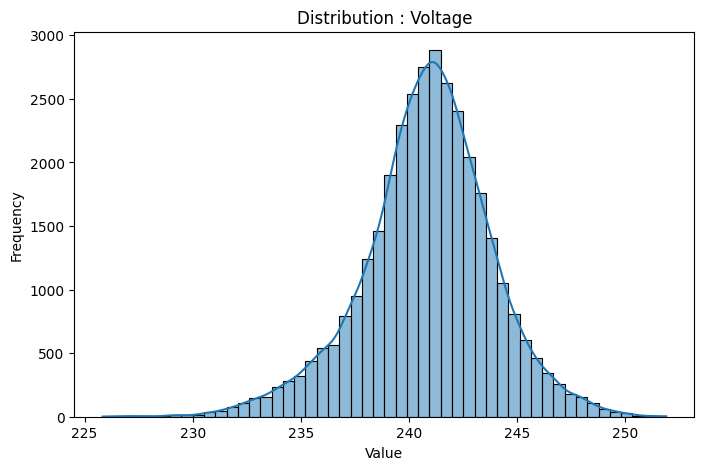

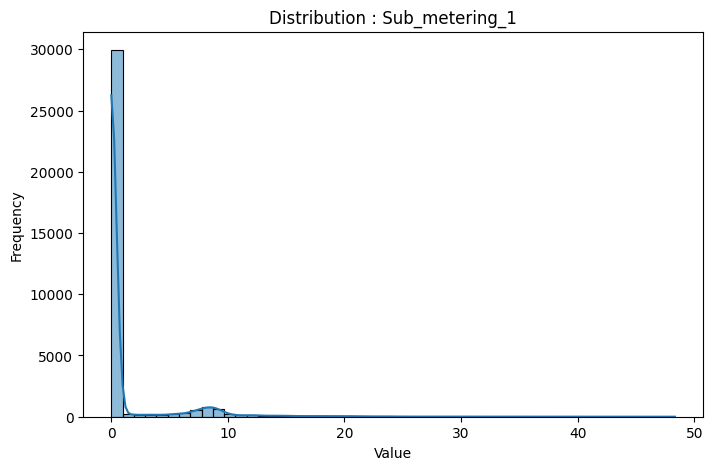

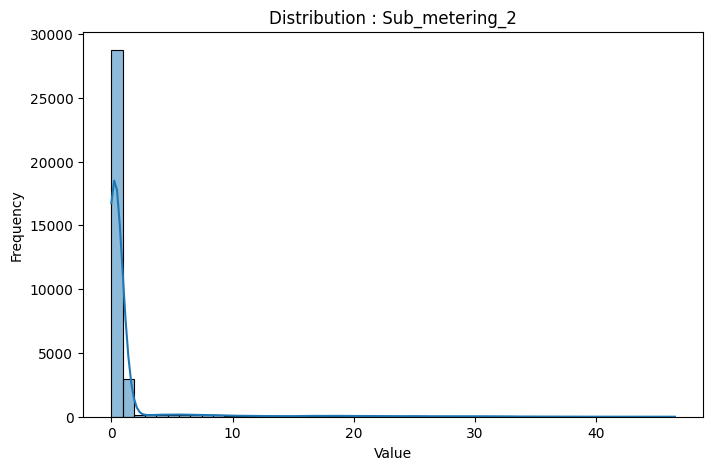

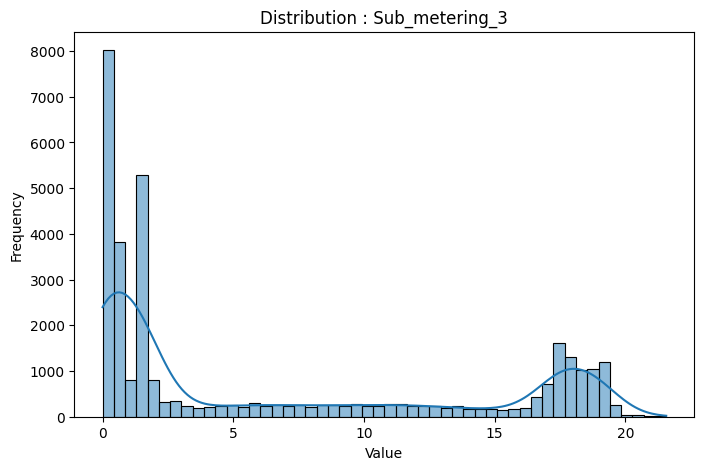

In [115]:
import matplotlib.pyplot as plt
import seaborn as sns


for col in df_household_hourly.columns:
    plt.figure(figsize=(8,5))
    sns.histplot(df_household_hourly[col], bins=50, kde=True)
    plt.title(f"Distribution : {col}")
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

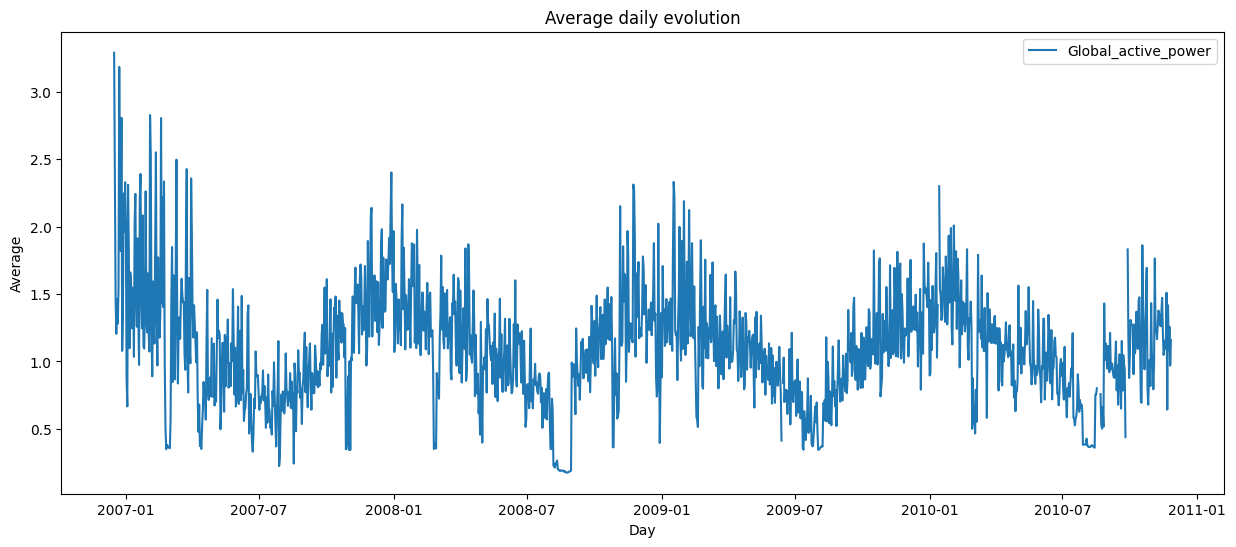

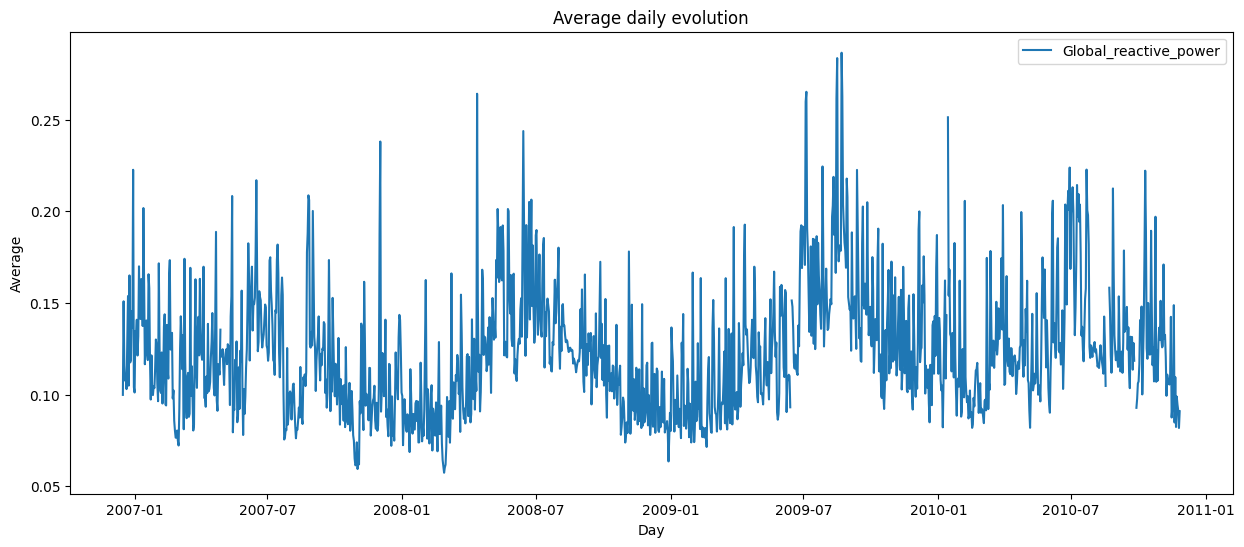

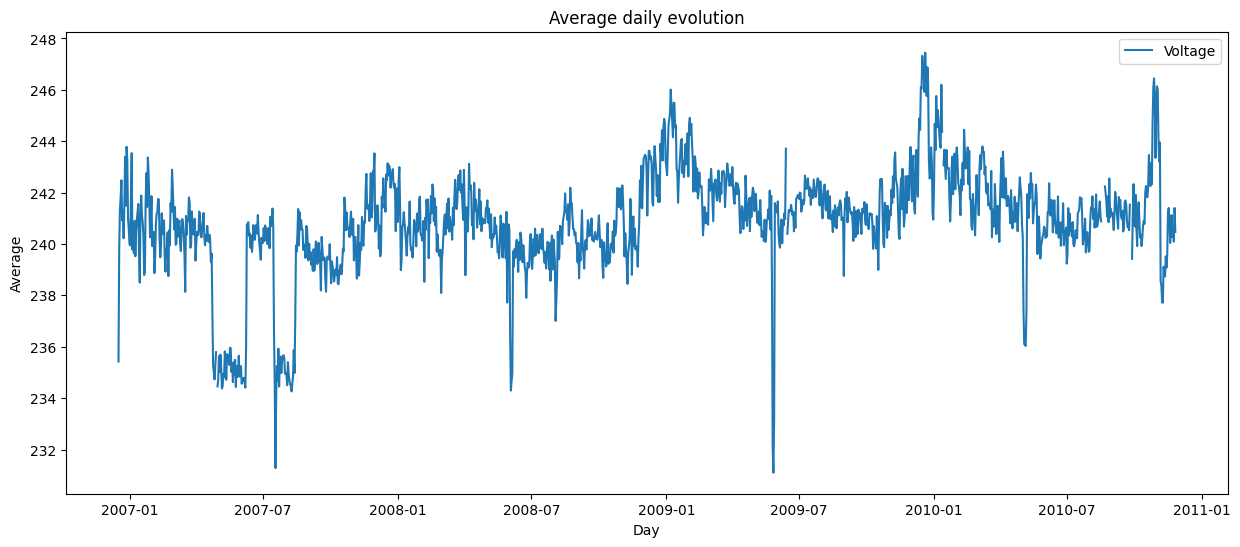

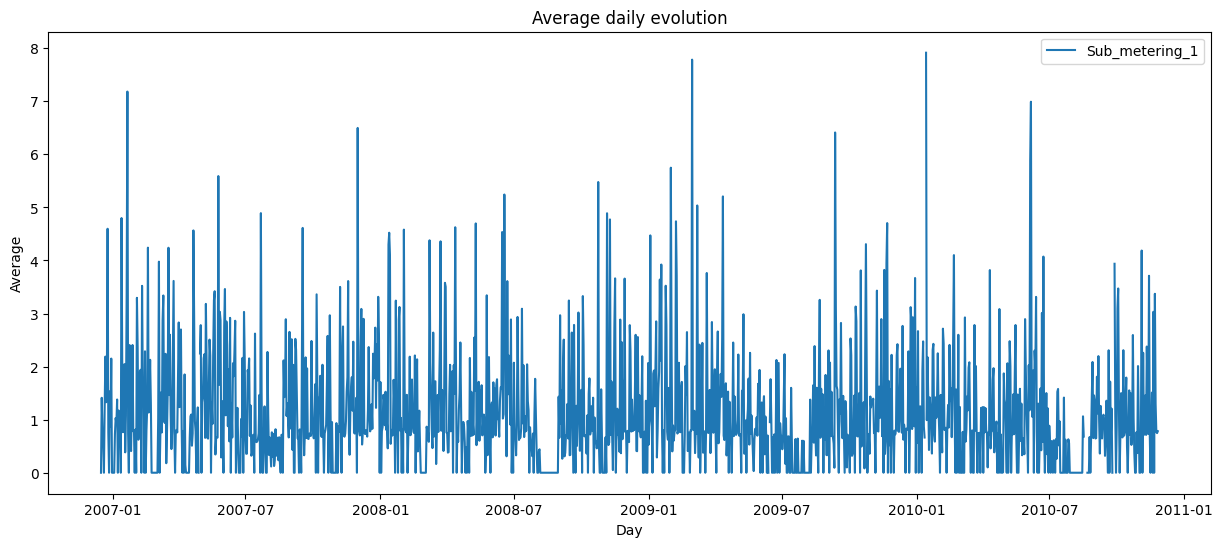

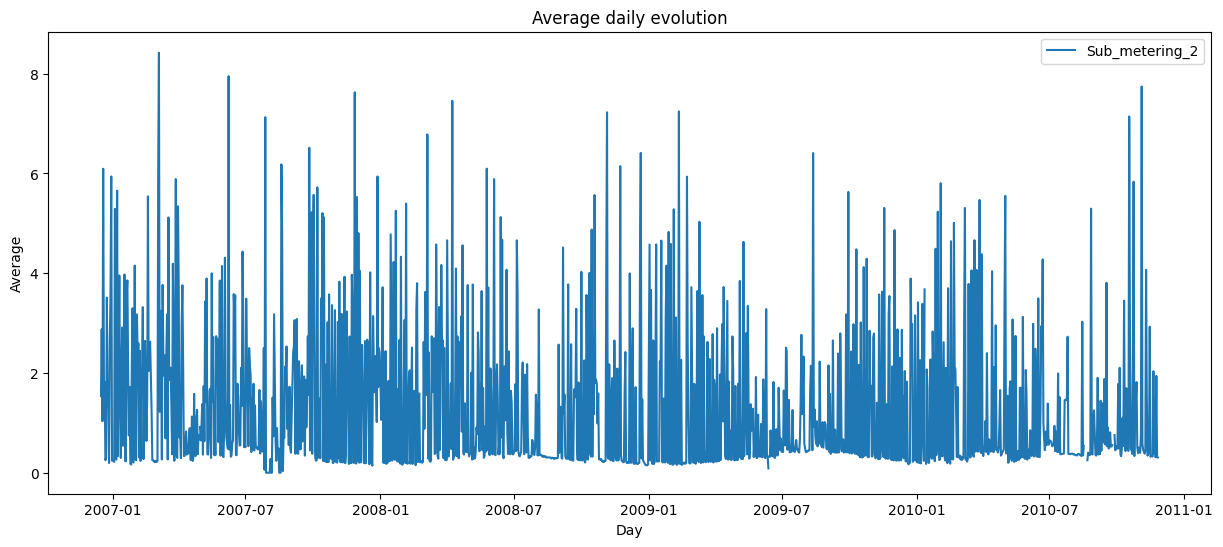

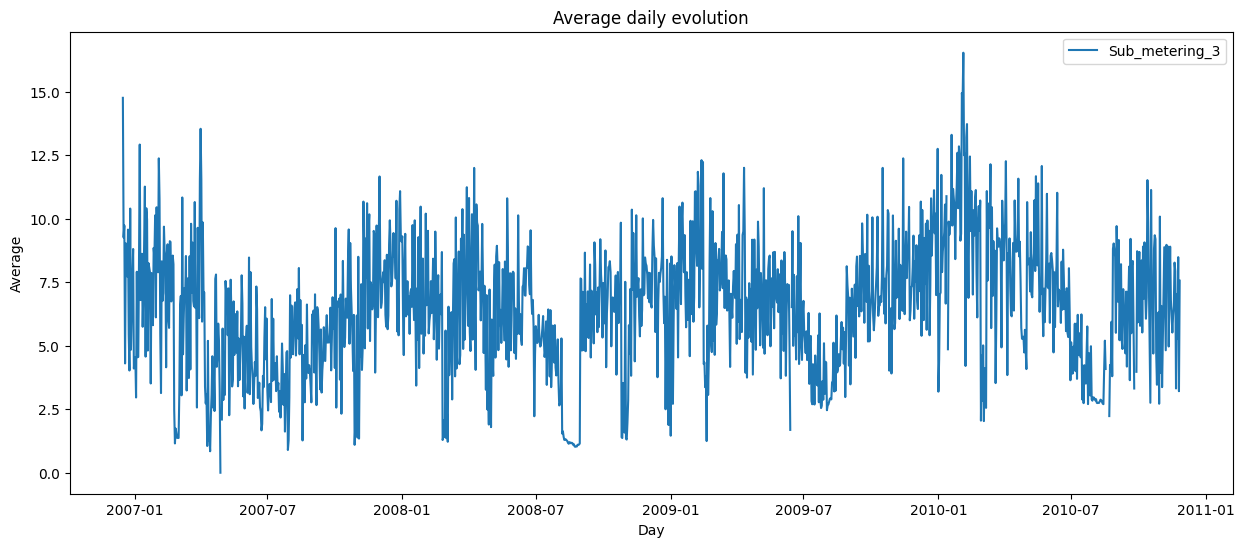

In [116]:
import matplotlib.pyplot as plt
import pandas as pd

# Moyenne par jour pour lisser
df_daily = df_household_hourly.resample('D').mean()


for col in df_daily.columns:
    plt.figure(figsize=(15,6))
    plt.plot(df_daily.index, df_daily[col], label=col)
    plt.title("Average daily evolution")
    plt.xlabel("Day")
    plt.ylabel("Average")
    plt.legend()
    plt.show()


# KMeans on non-normalized data

In [117]:
scores = {}
for i in range(2,20):
    kmeans=KMeans(n_clusters=i, random_state=0)
    clusters=kmeans.fit_predict(df_household_hourly)
    silhouette_avg = silhouette_score(df_household_hourly, clusters)
    calinski = calinski_harabasz_score(df_household_hourly, clusters)
    davies = davies_bouldin_score(df_household_hourly, clusters)
    scores[f"n_clusters = {i}"]={"inertie":kmeans.inertia_,
                                "silhouette score":silhouette_avg,
                                "calinski": calinski,
                                "davies": davies
                                 }

In [118]:
scores

{'n_clusters = 2': {'inertie': 2675094.703216306,
  'silhouette score': 0.5601114241997553,
  'calinski': 6817.431717312036,
  'davies': 0.9703722977798807},
 'n_clusters = 3': {'inertie': 1070777.0449338981,
  'silhouette score': 0.6082098348699732,
  'calinski': 34109.91535898505,
  'davies': 0.7083592842294499},
 'n_clusters = 4': {'inertie': 861179.4000831174,
  'silhouette score': 0.5966789416403563,
  'calinski': 31045.33107499251,
  'davies': 0.8566552069806133},
 'n_clusters = 5': {'inertie': 804045.4798921488,
  'silhouette score': 0.5976081761146748,
  'calinski': 25544.670936158596,
  'davies': 0.9704428136991791},
 'n_clusters = 6': {'inertie': 679852.1249391215,
  'silhouette score': 0.4941662922923215,
  'calinski': 25416.299015698285,
  'davies': 0.9376614020256967},
 'n_clusters = 7': {'inertie': 647001.7370126401,
  'silhouette score': 0.4414624958036681,
  'calinski': 22544.068420254112,
  'davies': 1.0315991405148839},
 'n_clusters = 8': {'inertie': 504118.6609934446

In [119]:
kmeans=KMeans(n_clusters=3, random_state=0)
clusters=kmeans.fit_predict(df_household_hourly)

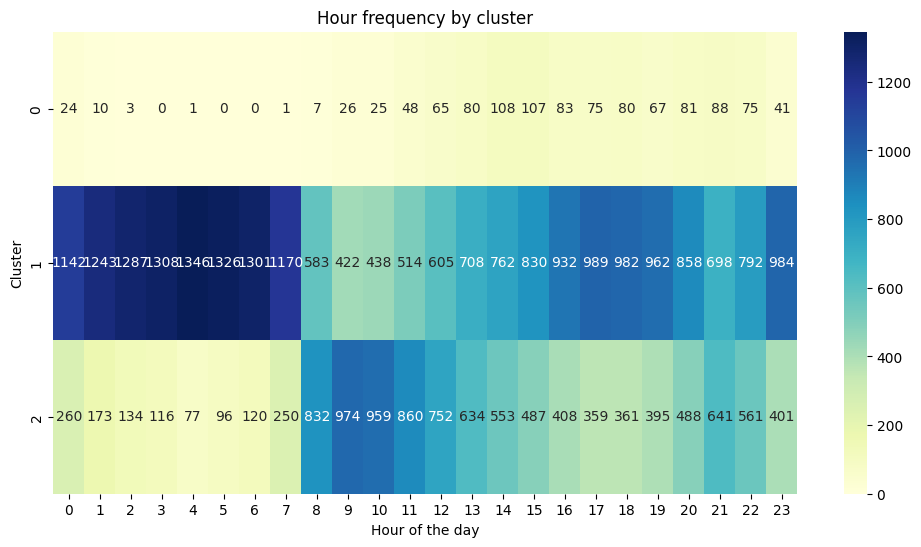

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Extraire l'heure
df = df_household_hourly.copy()
df['hour'] = df.index.hour

# Ajouter les clusters comme colonne temporaire
df['cluster'] = clusters

# Calculer les fréquences d'heures par cluster
hour_counts = df.groupby('cluster')['hour'].value_counts().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(hour_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Hour frequency by cluster")
plt.xlabel("Hour of the day")
plt.ylabel("Cluster")
plt.show()


In [121]:
centroids = kmeans.cluster_centers_

# Mettre dans un DataFrame avec les noms de colonnes
df_centroids = pd.DataFrame(centroids, columns=df_household_hourly.columns)

print("Centroïdes des clusters :")
df_centroids

Centroïdes des clusters :


,Global_active_power,Global_reactive_power,Voltage,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,3.019054,0.194341,238.566826,3.114860,22.076360,10.523651
1,0.626148,0.118169,241.504043,0.560245,0.528409,1.503852
2,1.846228,0.127946,239.714107,2.064868,0.778367,16.142129


### Conclusion : 

Cluster 0 -> very high consumption 

Cluster 1 -> no consumption (on hours when no one is supposedly at home)

Cluster 2 -> Usual consumption (when people are at home)

# KMeans on normalized data

In [122]:
sc = StandardScaler()
df_norm = sc.fit_transform(df_household_hourly)
df_norm=pd.DataFrame(df_norm, columns=df_household_hourly.columns, index=df_household_hourly.index)

In [123]:
scores = {}
for i in range(2,20):
    kmeans=KMeans(n_clusters=i, random_state=0)
    clusters=kmeans.fit_predict(df_norm)
    silhouette_avg = silhouette_score(df_norm, clusters)
    calinski = calinski_harabasz_score(df_norm, clusters)
    davies = davies_bouldin_score(df_norm, clusters)
    scores[f"n_clusters = {i}"]={
                                "silhouette score":silhouette_avg,
                                "calinski": calinski,
                                "davies": davies
                                 }

In [124]:
scores

{'n_clusters = 2': {'silhouette score': 0.3772816550231473,
  'calinski': 13610.11321487502,
  'davies': 1.3622530077327726},
 'n_clusters = 3': {'silhouette score': 0.38555797522616514,
  'calinski': 12545.64900820948,
  'davies': 1.1726299023973035},
 'n_clusters = 4': {'silhouette score': 0.3798954927941837,
  'calinski': 12971.083460270329,
  'davies': 1.128722732920758},
 'n_clusters = 5': {'silhouette score': 0.3129308129570927,
  'calinski': 11815.273036413362,
  'davies': 1.1948186631481679},
 'n_clusters = 6': {'silhouette score': 0.3054488360232882,
  'calinski': 10028.729675108569,
  'davies': 1.319707102883828},
 'n_clusters = 7': {'silhouette score': 0.30888726617098267,
  'calinski': 9677.013833643294,
  'davies': 1.3274453817873264},
 'n_clusters = 8': {'silhouette score': 0.26575438269716967,
  'calinski': 9694.40520586894,
  'davies': 1.2844172314992737},
 'n_clusters = 9': {'silhouette score': 0.2753274193374376,
  'calinski': 9934.987275292291,
  'davies': 1.23433119

In [125]:
kmeans=KMeans(n_clusters=3, random_state=0)
clusters=kmeans.fit_predict(df_norm)

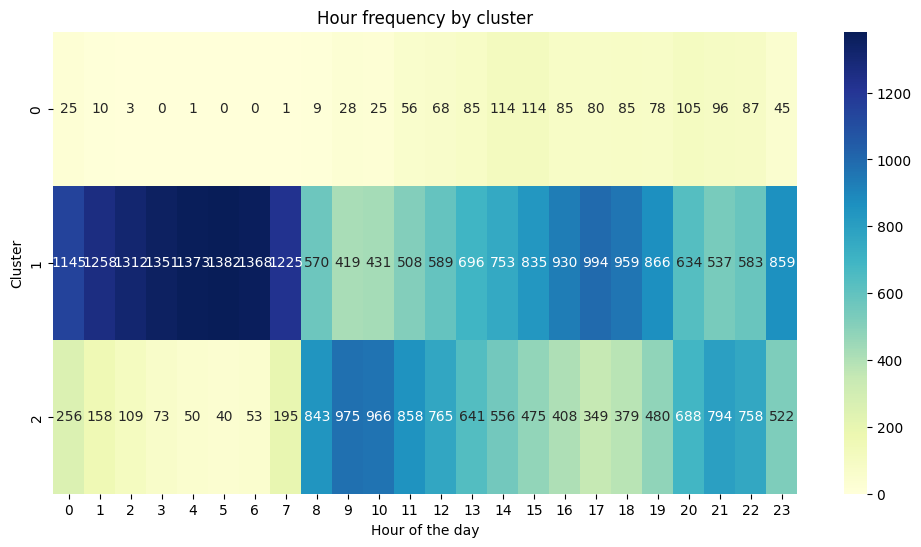

In [126]:
# Extraire l'heure
df = df_norm.copy()
df['hour'] = df.index.hour

# Ajouter les clusters comme colonne temporaire
df['cluster'] = clusters

# Calculer les fréquences d'heures par cluster
hour_counts = df.groupby('cluster')['hour'].value_counts().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(hour_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Hour frequency by cluster")
plt.xlabel("Hour of the day")
plt.ylabel("Cluster")
plt.show()

In [127]:
centroids = kmeans.cluster_centers_

# Mettre dans un DataFrame avec les noms de colonnes
df_centroids = pd.DataFrame(centroids, columns=df_norm.columns)

print("Centroïds:")
print(df_centroids)

Centroïds:
   Global_active_power  Global_reactive_power   Voltage  Sub_metering_1  \
0             2.142738               1.170095 -0.772109        0.669417   
1            -0.597355              -0.159479  0.295753       -0.256542   
2             0.905657               0.178792 -0.478813        0.415366   

   Sub_metering_2  Sub_metering_3  
0        4.709722        0.552445  
1       -0.199025       -0.647124  
2       -0.119162        1.167435  


### Conclusion : 

Analysis is the same as previously on the normalized data

# BIRCH

### Not normalized

In [128]:
from sklearn.cluster import Birch

scores = {}
for i in range(2, 20):

    birch = Birch(
        n_clusters=i,
    )
    
    clusters = birch.fit_predict(df_household_hourly)
    silhouette_avg = silhouette_score(df_household_hourly, clusters)
    calinski = calinski_harabasz_score(df_household_hourly, clusters)
    davies = davies_bouldin_score(df_household_hourly, clusters)
    scores[f"n_clusters = {i}"] = {
        "silhouette score": silhouette_avg,
        "calinski": calinski,
        "davies": davies
    }

In [129]:
scores

{'n_clusters = 2': {'silhouette score': 0.5851821831521259,
  'calinski': 6567.757778247284,
  'davies': 0.8559880605319482},
 'n_clusters = 3': {'silhouette score': 0.6000734933000668,
  'calinski': 32614.641381234076,
  'davies': 0.7039809925428054},
 'n_clusters = 4': {'silhouette score': 0.5929041719746043,
  'calinski': 26304.55906597179,
  'davies': 0.692060717501245},
 'n_clusters = 5': {'silhouette score': 0.5327669949149427,
  'calinski': 23757.210204736577,
  'davies': 0.8258040204726447},
 'n_clusters = 6': {'silhouette score': 0.5325573922165375,
  'calinski': 20667.373356369968,
  'davies': 0.9590215048166505},
 'n_clusters = 7': {'silhouette score': 0.4969716488505225,
  'calinski': 19591.15180301622,
  'davies': 1.0824434734066295},
 'n_clusters = 8': {'silhouette score': 0.46316401568130855,
  'calinski': 17484.511098457755,
  'davies': 1.1040820533052385},
 'n_clusters = 9': {'silhouette score': 0.4620657955027048,
  'calinski': 15862.020342229544,
  'davies': 1.123960

In [130]:
birch = Birch(
        n_clusters=3,
    )
labels_birch = birch.fit_predict(df_household_hourly)

Centroïds:
         Global_active_power  Global_reactive_power   Voltage  Sub_metering_1  \
cluster                                                                         
0                   0.838363               0.052588 -0.394127        0.238065   
1                   2.091142               1.037869 -0.720885        0.446062   
2                  -0.498250              -0.075155  0.221540       -0.134331   

         Sub_metering_2  Sub_metering_3  
cluster                                  
0             -0.132000        1.331535  
1              4.970277        0.544316  
2             -0.178147       -0.656892  


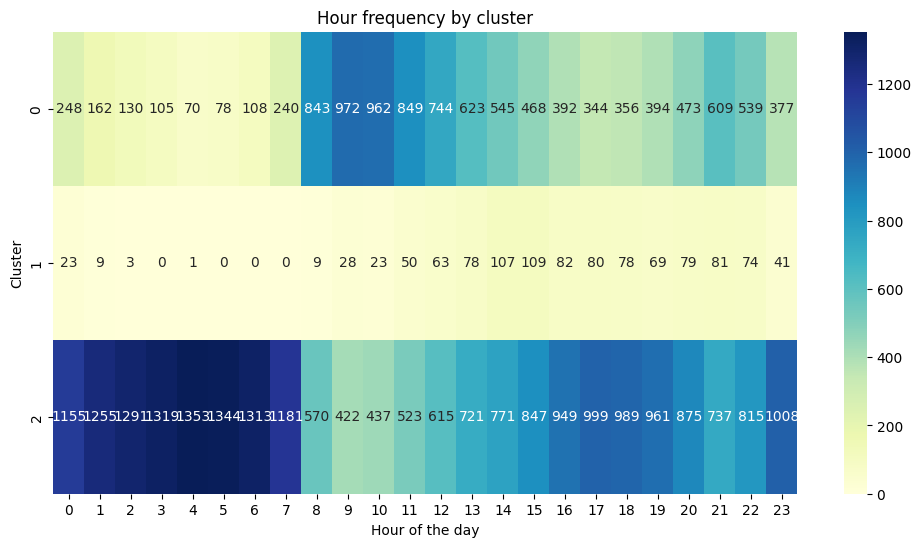

In [131]:
df = df_norm.copy()
df['hour'] = df.index.hour

# Ajouter les clusters comme colonne temporaire
df['cluster'] = labels_birch
# ---- centroïdes (moyenne des features par cluster) ----
centers_birch = df.groupby("cluster")[df_norm.columns].mean()

print("Centroïds:")
print(centers_birch)


# Calculer les fréquences d'heures par cluster
hour_counts = df.groupby('cluster')['hour'].value_counts().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(hour_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Hour frequency by cluster")
plt.xlabel("Hour of the day")
plt.ylabel("Cluster")
plt.show()

### Conclusion : 

Cluster 0 -> Regular consumption (matches with time where people are at home)

Cluster 1 -> Very high consumption

Cluster 2 -> Low consumption

## Normalized

In [132]:
scores = {}
for i in range(2, 20):

    birch = Birch(
        n_clusters=i,
    )
    
    clusters = birch.fit_predict(df_norm)
    silhouette_avg = silhouette_score(df_norm, clusters)
    calinski = calinski_harabasz_score(df_norm, clusters)
    davies = davies_bouldin_score(df_norm, clusters)
    scores[f"n_clusters = {i}"] = {
        "silhouette score": silhouette_avg,
        "calinski": calinski,
        "davies": davies
    }

In [133]:
scores 

{'n_clusters = 2': {'silhouette score': 0.5677317318396407,
  'calinski': 7012.065923095553,
  'davies': 0.8740765549992273},
 'n_clusters = 3': {'silhouette score': 0.571292955770198,
  'calinski': 5938.570669178065,
  'davies': 0.822709015444201},
 'n_clusters = 4': {'silhouette score': 0.38153442659532255,
  'calinski': 6469.110874475871,
  'davies': 1.0992885575401472},
 'n_clusters = 5': {'silhouette score': 0.18795739391269736,
  'calinski': 5973.436694182278,
  'davies': 1.3365730065033925},
 'n_clusters = 6': {'silhouette score': 0.18465160844931588,
  'calinski': 4978.57143668995,
  'davies': 1.5393750687469436},
 'n_clusters = 7': {'silhouette score': 0.18288737039504108,
  'calinski': 4307.649715987193,
  'davies': 1.5357940515693298},
 'n_clusters = 8': {'silhouette score': 0.181709871301815,
  'calinski': 3755.8588108623167,
  'davies': 1.5121495141959527},
 'n_clusters = 9': {'silhouette score': 0.15471693081742674,
  'calinski': 3665.7162424827575,
  'davies': 1.45139683

In [134]:
birch = Birch(
        n_clusters=3,
    )
labels_birch = birch.fit_predict(df_norm)

Centroïds:
         Global_active_power  Global_reactive_power   Voltage  Sub_metering_1  \
cluster                                                                         
0                  -0.101384              -0.065833  0.038468       -0.074964   
1                   2.089977               0.935089 -0.759523        0.386457   
2                   2.488819               3.050964 -1.058109        5.780505   

         Sub_metering_2  Sub_metering_3  
cluster                                  
0             -0.170883       -0.030894  
1              4.730356        0.628298  
2              0.088794        0.787551  


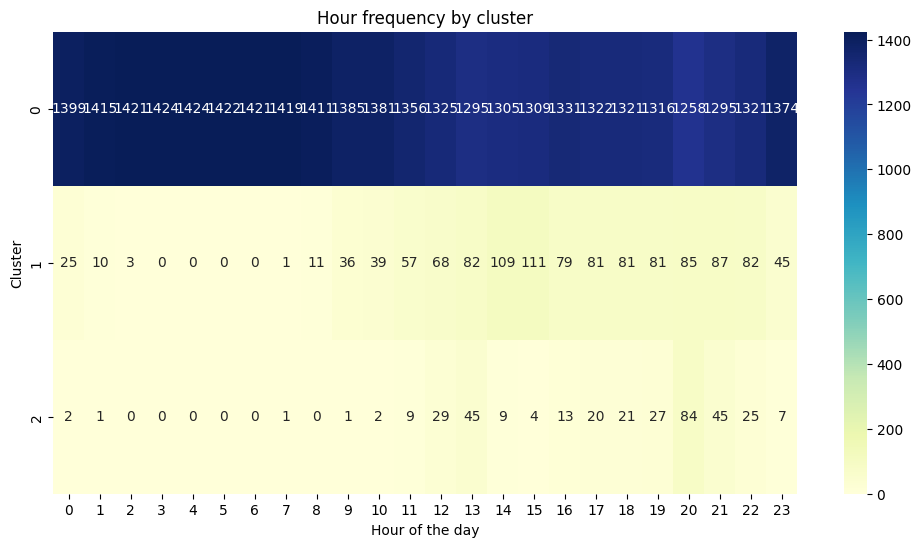

In [135]:
df = df_norm.copy()
df['hour'] = df.index.hour

# Ajouter les clusters comme colonne temporaire
df['cluster'] = labels_birch
# ---- centroïdes (moyenne des features par cluster) ----
centers_birch = df.groupby("cluster")[df_norm.columns].mean()

print("Centroïds:")
print(centers_birch)


# Calculer les fréquences d'heures par cluster
hour_counts = df.groupby('cluster')['hour'].value_counts().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(hour_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Hour frequency by cluster")
plt.xlabel("Hour of the day")
plt.ylabel("Cluster")
plt.show()

### Conclusion : 

Can't really interprete here, cluster 1 and 2 are too small compared to 0, normalizing data doesn't seem like a good choice here 

# PCA 

## KMeans

In [136]:
from sklearn.decomposition import PCA 
pca = PCA()
pca.fit(df_norm)
Z = pca.transform(df_norm)

/var/folders/n7/vmxdgmk9425grf4994mk9sv80000gn/T/ipykernel_88293/3668206356.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig_spectrum.show()


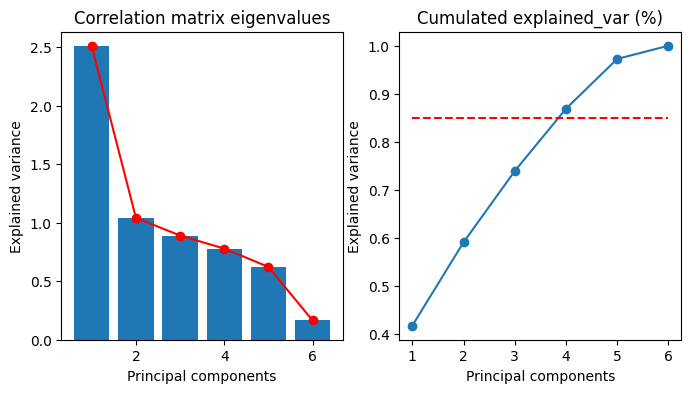

In [137]:
variances = Z.var(axis=0)
total_var = variances.sum() 
explained_var = variances / total_var
cum_explained_var = np.cumsum(explained_var)
fig_spectrum, axes = plt.subplots(1, 2, figsize=(8, 4))


ax_eig = axes[0]
p = Z.shape[1]
ax_eig.bar(range(1, p + 1), variances) 
ax_eig.plot(range(1, p + 1), variances, "o-r")
ax_eig.set_title("Correlation matrix eigenvalues")
ax_eig.set_xlabel("Principal components")
ax_eig.set_ylabel("Explained variance")
ax_cum_var = axes[1]
ax_cum_var.plot(range(1, p + 1), cum_explained_var, "o-") 
ax_cum_var.plot(range(1, p + 1), 0.85 * np.ones(p), "--r")
ax_cum_var.set_title("Cumulated explained_var (%)")
ax_cum_var.set_xlabel("Principal components")
ax_cum_var.set_ylabel("Explained variance")
fig_spectrum.show()


#### We take 4 components based on the graphics 

In [138]:
pca = PCA(n_components=4)
X_pca = pca.fit_transform(df_norm)

df_pca = pd.DataFrame(
    X_pca,
    columns=[f"PC{i+1}" for i in range(4)],  
    index=df_household_hourly.index           
)

In [139]:
scores = {}
for i in range(2,20):
    kmeans=KMeans(n_clusters=i, random_state=0)
    clusters=kmeans.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, clusters)
    calinski = calinski_harabasz_score(df_pca, clusters)
    davies = davies_bouldin_score(df_pca, clusters)
    scores[f"n_clusters = {i}"]={
                                "silhouette score":silhouette_avg,
                                "calinski": calinski,
                                "davies": davies
                                 }

In [140]:
scores

{'n_clusters = 2': {'silhouette score': 0.4118847143266758,
  'calinski': 16531.400599887536,
  'davies': 1.202805411278246},
 'n_clusters = 3': {'silhouette score': 0.4227176304795349,
  'calinski': 15564.136847431337,
  'davies': 1.0372046543843585},
 'n_clusters = 4': {'silhouette score': 0.41991739128367567,
  'calinski': 16583.907879202954,
  'davies': 0.980335256152115},
 'n_clusters = 5': {'silhouette score': 0.29766076707298766,
  'calinski': 16013.330767899099,
  'davies': 1.075746839266316},
 'n_clusters = 6': {'silhouette score': 0.2956470812200363,
  'calinski': 13816.015883148864,
  'davies': 1.1682163416610323},
 'n_clusters = 7': {'silhouette score': 0.29729280865554786,
  'calinski': 13708.451987234223,
  'davies': 1.1982322417880353},
 'n_clusters = 8': {'silhouette score': 0.30912980344903407,
  'calinski': 13521.621885809966,
  'davies': 1.1471639877057078},
 'n_clusters = 9': {'silhouette score': 0.2837269605274443,
  'calinski': 13372.83151106764,
  'davies': 1.163

In [141]:
kmeans=KMeans(n_clusters=4, random_state=0)
clusters = kmeans.fit_predict(df_pca)

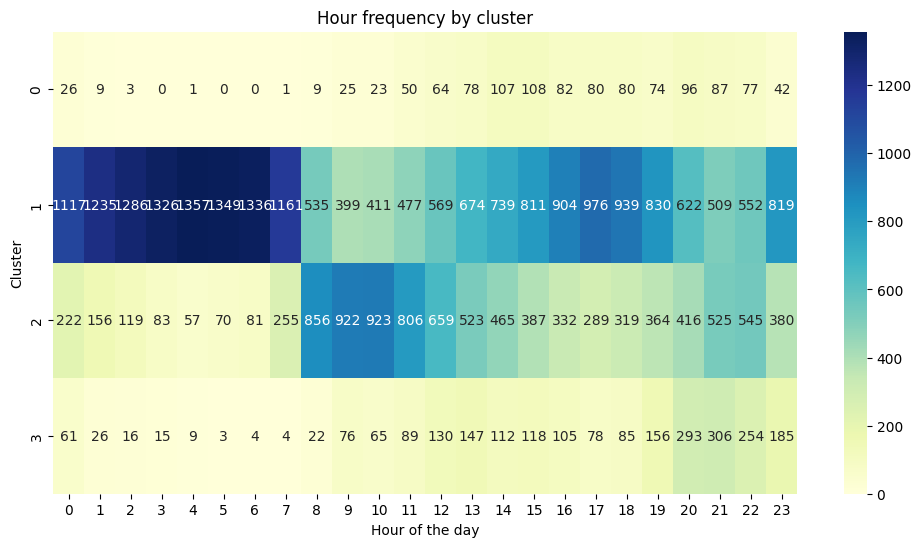

In [142]:
# Extraire l'heure
df = df_pca.copy()
df['hour'] = df.index.hour

# Ajouter les clusters comme colonne temporaire
df['cluster'] = clusters

# Calculer les fréquences d'heures par cluster
hour_counts = df.groupby('cluster')['hour'].value_counts().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(hour_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Hour frequency by cluster")
plt.xlabel("Hour of the day")
plt.ylabel("Cluster")
plt.show()

In [143]:
centroids = kmeans.cluster_centers_

# Mettre dans un DataFrame avec les noms de colonnes
df_centroids = pd.DataFrame(centroids, columns=df_pca.columns)

print("Centroïds:")
print(df_centroids)

Centroïds:
        PC1       PC2       PC3       PC4
0  3.794819  1.611843  3.498249  0.118499
1 -0.966936  0.321565 -0.009521 -0.122722
2  0.923951 -1.112094  0.031271  0.225976
3  2.965361  0.980133 -1.710784  0.098839


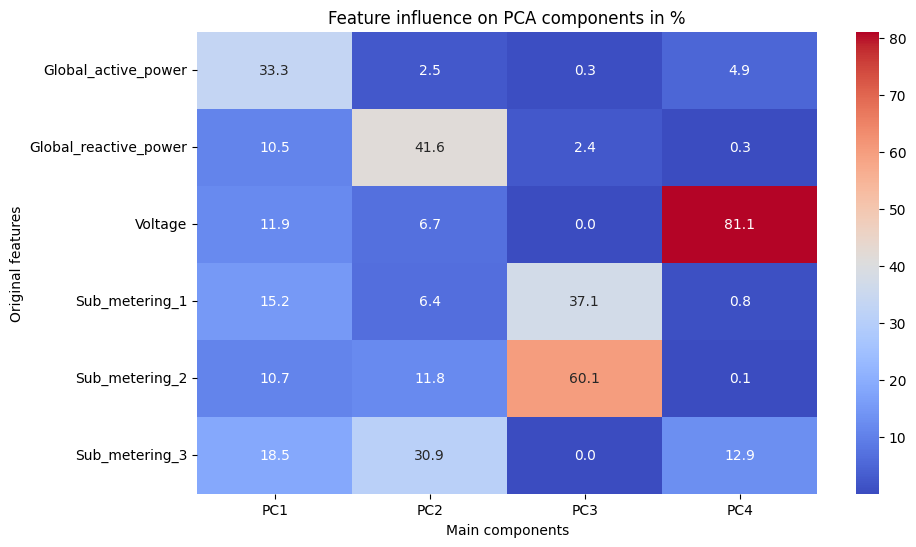

In [144]:
# ---- loadings ----
# shape (n_features, n_components)
loadings = pca.components_.T  

# pourcentage d'influence par colonne sur chaque composante
loadings_percent = pd.DataFrame(
    (loadings**2 / np.sum(loadings**2, axis=0)) * 100,
    index=df_household_hourly.columns,
    columns=[f"PC{i+1}" for i in range(4)]
)


# ---- visualisation heatmap ----
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(loadings_percent, annot=True, fmt=".1f", cmap="coolwarm")
plt.title("Feature influence on PCA components in %")
plt.xlabel("Main components")
plt.ylabel("Original features")
plt.show()


### Conlusion 

Since Global active power is influent in PC1, sub meterings 1 & 2 in PC3, it is safe to assume based on the previous results that cluster 0 would be a high consumption cluster, 1 would be very low, 2 would be low/average and 3 high 

## Birch

In [145]:
scores = {}
for i in range(2, 20):

    birch = Birch(
        n_clusters=i,
    )
    
    clusters = birch.fit_predict(df_pca)
    silhouette_avg = silhouette_score(df_pca, clusters)
    calinski = calinski_harabasz_score(df_pca, clusters)
    davies = davies_bouldin_score(df_pca, clusters)
    scores[f"n_clusters = {i}"] = {
        "silhouette score": silhouette_avg,
        "calinski": calinski,
        "davies": davies
    }

In [146]:
scores

{'n_clusters = 2': {'silhouette score': 0.597984282963806,
  'calinski': 7050.514236106287,
  'davies': 0.7271176829732503},
 'n_clusters = 3': {'silhouette score': 0.5470987161578513,
  'calinski': 8696.209615172595,
  'davies': 0.8378210827248328},
 'n_clusters = 4': {'silhouette score': 0.5300922725242866,
  'calinski': 6048.7030303199845,
  'davies': 0.9202855914614116},
 'n_clusters = 5': {'silhouette score': 0.499689891179272,
  'calinski': 4793.605069214196,
  'davies': 0.8820525317300725},
 'n_clusters = 6': {'silhouette score': 0.15564021886445864,
  'calinski': 5351.2684297300575,
  'davies': 1.3446394845522127},
 'n_clusters = 7': {'silhouette score': 0.1523115388270605,
  'calinski': 4608.945464625143,
  'davies': 1.3697440719199512},
 'n_clusters = 8': {'silhouette score': 0.14340512056195992,
  'calinski': 4449.310311825618,
  'davies': 1.37741025370754},
 'n_clusters = 9': {'silhouette score': 0.1608775947343476,
  'calinski': 4712.7716835984675,
  'davies': 1.3399707001

In [147]:
birch = Birch(
        n_clusters=2,
    )
labels_birch = birch.fit_predict(df_pca)

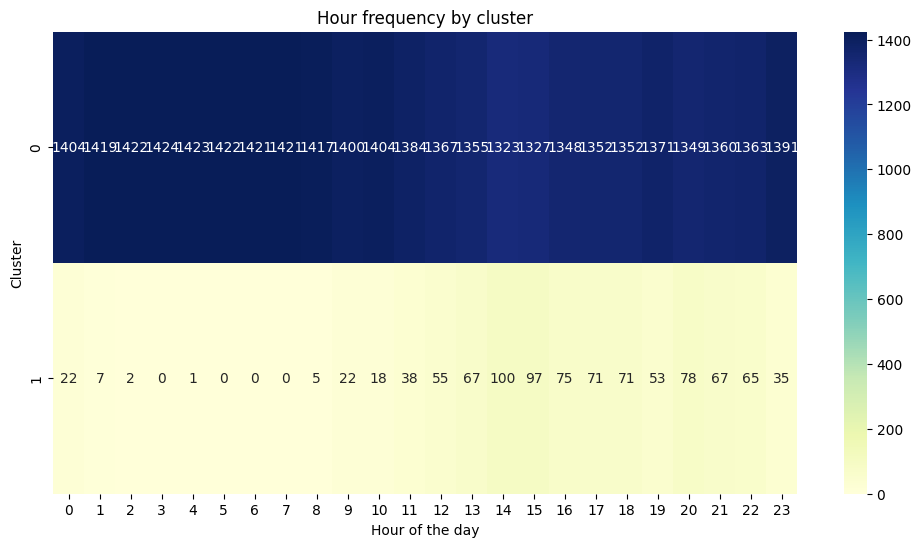

In [148]:
# Extraire l'heure
df = df_pca.copy()
df['hour'] = df.index.hour

# Ajouter les clusters comme colonne temporaire
df['cluster'] = labels_birch

# Calculer les fréquences d'heures par cluster
hour_counts = df.groupby('cluster')['hour'].value_counts().unstack(fill_value=0)

# Heatmap
plt.figure(figsize=(12,6))
sns.heatmap(hour_counts, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Hour frequency by cluster")
plt.xlabel("Hour of the day")
plt.ylabel("Cluster")
plt.show()

In [149]:
df_centroids = df.groupby('cluster').mean()
df_centroids.drop(["hour"], axis=1)
print("Centroïdes des clusters (BIRCH) :")
print(df_centroids)

Centroïdes des clusters (BIRCH) :
              PC1       PC2       PC3       PC4       hour
cluster                                                   
0       -0.106789 -0.047943 -0.108414 -0.004864  11.376381
1        3.738076  1.678199  3.794958  0.170248  15.944152


### Conclusion 

Hard to interprete as well, clusters don't have similar size so it would be outliers/"normal"